# Intro à Pandas

Des morceaux de ce Notebook sont tirées ou adaptées de [cette introduction à Pandas, par Google](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb?hl=fr), disponible sous licence Apache 2.0.

D'autres sections sont inspirées de [ce Notebook, fourni avec le livre *Hands-On Machine Learning with Scikit-Learn
and TensorFlow*](https://github.com/ageron/handson-ml3/blob/main/tools_pandas.ipynb), également sous licence Apache 2.0.

Pandas est une bibliothèque qui comporte **beaucoup** de fonctionnalités, on va couvrir les bases dans ce Notebook mais beaucoup de fonctionnalités ne seront pas mentionnées. N'hésitez pas à aller voir le second notebook mentionné pour en apprendre plus.

## Introduction

Numpy est une bibliothèque de manipulation de données qui sont généralement **toutes numériques**, généralement en 1D ou en 2D.

L'objectif quand on utilise numpy est généralement de faire des calculs mathématiques sur des vecteurs.

&nbsp;

Pandas comporte des similarités avec numpy, mais a des différences importantes. Pandas sert plus spécifiquement, à **analyser des données tabulées**, qui ne sont pas forcément toutes numériques.

On va avoir des colonnes généralement **nommées**, qui auront chacune leur propre type de données :

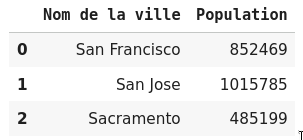

In [1]:
#@title Importations
# La façon la plus commune d'importer pandas est :
import pandas as pd

# On va également réutiliser numpy à quelques endroits ici
import numpy as np

 On distingue deux grandes catégories de structures de données *Pandas* :

  * La **`Series`**, constituée d'une seule colonne.
  * Le **`DataFrame`**, un tableau 2D de données, avec des lignes et des colonnes étiquetées. Un `DataFrame` contient une ou plusieurs `Series`, chacune étant étiquetée.
  

## `Series` : similaire à un tableau numpy 1D

 Pour créer une `Series`, on utilise :

In [2]:
# À partir d'une liste
villes = ['San Francisco', 'San Jose', 'Sacramento']
series1 = pd.Series(villes)

# En une seule ligne
series2 = pd.Series(['Jimmy', 'Alice', 'Bob'])

# On peut aussi lui fournir un tableau numpy 1D
data = np.array([1, 2, 3, 4])
series3 = pd.Series(data)

display(series1)
display(series2)
display(series3)

,0
0,San Francisco
1,San Jose
2,Sacramento


,0
0,Jimmy
1,Alice
2,Bob


,0
0,1
1,2
2,3
3,4


❓ Petite parenthèse : la différence entre **`print()`** et **`display()`**

En python, `print()` est la façon standard d'afficher du texte. Sur des données simples, `display()` reste similaire :

In [3]:
print(10)
display(10)

print("bonjour!")
display("bonjour!")

10


10

bonjour!


'bonjour!'

`display()` permet d'afficher les données plus complexes dans un format joli.

*Pandas* en particulier se sert de ça pour bien présenter les données.

Faire un `print()` sur un objet de Pandas est beaucoup moins joli :

In [4]:
display(pd.Series(['San Francisco', 'San Jose', 'Sacramento']))

print("* * * * * * * *")
print("* * * * * * * *")

print(pd.Series(['San Francisco', 'San Jose', 'Sacramento']))

,0
0,San Francisco
1,San Jose
2,Sacramento


* * * * * * * *
* * * * * * * *
0    San Francisco
1         San Jose
2       Sacramento
dtype: object


Pour du texte seulement, vous pouvez utiliser `print()`, mais dans le doute, préférez `display()`.

Notez que par défaut, la valeur de la dernière ligne d'une cellule est affichée avec `display()`. On peut donc faire simplement :

In [5]:
serie = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

serie

,0
0,San Francisco
1,San Jose
2,Sacramento


## `DataFrame` : similaire à un tableau 2D ou à une feuille Excel

 Il est possible de créer des objets `DataFrame` en transmettant un `dictionnaire` qui met en correspondance les noms de colonnes (des `chaînes de caractères`) avec leur `Series` respective.

 On peut aussi passer une liste 2D ou un tableau 2D numpy directement, puis spécifier les noms des colonnes séparément.

In [6]:
# Syntaxe avec { 'nom': liste }
villes = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

df1 = pd.DataFrame({ 'Nom de la ville': villes, 'Population': population })
display(df1)

# Syntaxe avec une liste de listes
donnes = [
    ['San Francisco', 852469],
    ['San Jose', 1015785],
    ['Sacramento', 485199]
]

df2 = pd.DataFrame(donnes, columns=['Nom de la ville', 'Population'])
display(df2)

,Nom de la ville,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


,Nom de la ville,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


Des tableaux 2D de numpy sont forcément des *rectangles* : toutes les lignes ont la même taille.

&nbsp;

Pandas évite cette limitation via un petit truc : on ajoute le concept de **données manquantes**, représentées par `NaN`.

Dans certains cas, ex.: les `Series` utilisées n'ont pas toutes la même longueur, les valeurs manquantes sont remplacées par des valeurs [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) spéciales, pour indiquer que certaines données sont *manquantes*. Exemple :

In [7]:
villes = pd.Series(['San Francisco', 'San Jose', 'Sacramento', 'Montréal'])
population = pd.Series([852469, 1015785, 485199]) # Il manque la 4e population, celle de Montréal

df1 = pd.DataFrame({ 'Nom de la ville': villes, 'Population': population })
display(df1)

,Nom de la ville,Population
0,San Francisco,852469.0
1,San Jose,1015785.0
2,Sacramento,485199.0
3,Montréal,NaN


On reviendra un peu plus tard sur ce qu'on peut faire avec ce `NaN`

Le plus souvent, on charge un fichier `CSV` entier dans un `DataFrame`.

Dans l'exemple qui suit, le fichier chargé contient des données immobilières pour la Californie en 1990.

In [8]:
california_housing_df = pd.read_csv("https://raw.githubusercontent.com/WillKoehrsen/Hands-On-Machine-Learning/refs/heads/master/handson-ml-master/datasets/housing/housing.csv", sep=",")

# Prévisualisation des données avec display() : on voit les 5 premières et 5 dernières lignes pour avoir une petite idée de ce que ça contient
display(california_housing_df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Il s'agit d'un jeu de données assez classique en statistiques et en apprentissage machine. La version utilisée ici a été modifiée légèrement pour le livre *Hands-On Machine Learning with Scikit-Learn and TensorFlow*.

Chaque ligne regroupe des données sur plusieurs maisons d'un différent un *block* de la Californie (un *pâté de maisons* en français), par exemple :

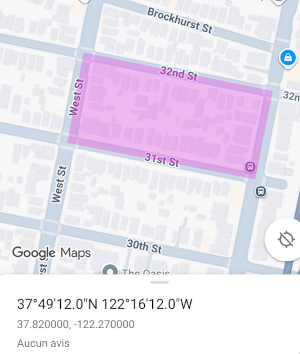

&nbsp;

On peut utiliser ce jeu de données :

> **En *Statistiques***: comprendre, décrire, analyser les données (ex.: )
>
> Par exemple : quelle est la relation entre la proximité à l'océan et la valeur des maisons? Est-ce que ça fait significativement monter le prix, ou pas vraiment?
>
> ***Apprentissage machine***: faire des **prédictions** pour des
  nouvelles valeurs, **sans forcément comprendre** comment ou pourquoi
  ça fonctionne derrière
>
> Par exemple : si on connaît quelques caractéristiques d'un nouveau pâté de maison (âge des maisons, population, salaire médian), on voudrait deviner la valeur des maisons.

## Explorer un `DataFrame`

Remarquez l'icône en bleu, en haut à droite quand on appelle `display(california_housing_df)`.

Cliquez dessus pour explorer les données avec la souris :

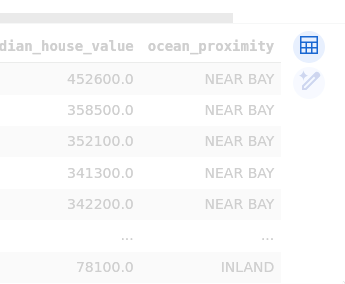

In [ ]:
#@title Exercice 0
display(california_housing_df)
# Cliquez sur l'icône pour voir une table interactive avec les données
# Triez les colonnes en cliquant sur l'en-tête
# Notez : le nombre de lignes conservées est limité à 20,000 par Google Colab,
# s'il y a plus de lignes que ça, les dernières ne sont pas considérées dans la
# table interactive
#####




## Terminologie

*Numpy*: Quand on parle de tableaux 2D en général, on a des **lignes** et des **colonnes**.

*Pandas*: Un `DataFrame` de pandas correspond à un **jeu de données** (en anglais, *dataset*). Chaque ligne est une **observation** (ex.: le block #1523 est une des observations), qui a différentes **caractéristiques** (en anglais, *features*).

Par exemple, l'observation #0 est le block qui a les caractéristiques suivantes :

- **longitude**: -114.3100
- **latitude**: 34.1900
- **housing_median_age**: 15.0000
- **total_rooms**: 5612.0000
- *etc*

## Vue d'ensemble des données

La méthode `mon_dataframe.describe()` permet d'afficher rapidement des statistiques intéressantes sur le jeu de données.

On peut voir d'un petit coup d'oeil :

- **count** : Le nombre de valeurs (excluant les valeurs manquantes)
- **mean** : La moyenne de cette colonne
- **std** : L'écart-type
- **min** et **max** : les valeurs minimum et maximum
- **25%, 50%, 75%** : les 25e/50e/75e percentiles (vous reparlerez de ça dans un cours de statistiques)

Notez qu'il manque quelques données dans la colonne `total_bedrooms` (20433 plutôt que 20640 comme les autres colonnes)

Notez également qu'une des colonnes est absente de ce résumé : la dernière colonne, `ocean_proximity`, contient du texte et ne peut donc pas être analysée avec des moyenne/min/max/etc.

In [9]:
display(california_housing_df.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Les `DataFrame` ont également des méthodes qui ressemblent à celles des tableaux 2D de numpy.

On a par exemple la moyenne avec `mon_dataframe.mean()`, les minimums et maximums avec `.min()` et `.max()`, ou encore `.std()` et `.var()` pour calculer l'écart-type et la variance.

&nbsp;

Contrairement à numpy, Pandas garde automatiquement les données regroupées par colonne. Autrement dit, `.max()` calcule **la valeur maximale de chaque caractéristique**.

Le résultat est une `Series` :

In [10]:
display(california_housing_df.max())

,0
longitude,-114.31
latitude,41.95
housing_median_age,52.0
total_rooms,39320.0
total_bedrooms,6445.0
population,35682.0
households,6082.0
median_income,15.0001
median_house_value,500001.0
ocean_proximity,NEAR OCEAN


Notez ici : le `max()` de `ocean_proximity` est un peu bizarre, car c'est une colonne textuelle...

Si on essayait de calculer la moyenne (`mean()`) en incluant cette colonne, on aurait une erreur de maths (on ne peut pas additionner puis diviser du texte, ça va lancer une erreur).

La prochaine section montre comment garder seulement certaines colonnes intéressantes

## Extraire des caractéristiques (colonnes spécifiques)

Un gros avantage des `Series` et `DataFrame` est que les lignes et colonnes peuvent être **nommées**.

On peut sélectionner une des colonnes avec la syntaxe :

In [11]:
# On utilise les [ ] avec le nom de la colonne en string
california_housing_df['latitude']

,latitude
0,37.88
1,37.86
2,37.85
3,37.85
4,37.85
...,...
20635,39.48
20636,39.49
20637,39.43
20638,39.43


Dans le cas où les noms de colonnes n'ont pas de symboles spéciaux ni d'espaces, on peut également utiliser :

In [12]:
california_housing_df.latitude

,latitude
0,37.88
1,37.86
2,37.85
3,37.85
4,37.85
...,...
20635,39.48
20636,39.49
20637,39.43
20638,39.43


Une seule colonne tirée d'un `DataFrame` est une `Series`.

On peut en demander plusieurs d'un coup pour avoir un sous-`DataFrame`, avec seulement quelques colonnes :

In [13]:
# On peut mettre une liste de colonnes à garder entre les crochets :
colonnes_a_extraire = ['latitude', 'longitude']
display(california_housing_df[colonnes_a_extraire])

# Équivalent :
# Notez bien les *doubles* crochets, car c'est une liste entre crochets :
display(california_housing_df[['latitude', 'longitude']])

,latitude,longitude
0,37.88,-122.23
1,37.86,-122.22
2,37.85,-122.24
3,37.85,-122.25
4,37.85,-122.25
...,...,...
20635,39.48,-121.09
20636,39.49,-121.21
20637,39.43,-121.22
20638,39.43,-121.32


,latitude,longitude
0,37.88,-122.23
1,37.86,-122.22
2,37.85,-122.24
3,37.85,-122.25
4,37.85,-122.25
...,...,...
20635,39.48,-121.09
20636,39.49,-121.21
20637,39.43,-121.22
20638,39.43,-121.32


In [ ]:
#@title Exercice 1
# La variable `df` est un DataFrame avec les données immobilières de la Californie
# (mêmes qu'utilisées en exemple juste ci-haut)
df = pd.read_csv("https://raw.githubusercontent.com/WillKoehrsen/Hands-On-Machine-Learning/refs/heads/master/handson-ml-master/datasets/housing/housing.csv", sep=",")

#######

### Affichez (display) uniquement la colonne qui correspond à la proximité à
### l'océan de chaque block

### Combien de gens sont inclus dans ce jeu de données?
### Prenez la somme de la population pour chaque block

### Créez une nouvelle variable `infos_pieces` qui contient seulement le nombre total
### de chambres à coucher et le nombre total de pièces par block. Affichez cette
### variable avec display()

### Affichez un résumé de la colonne `infos_pieces` avec `describe()`

### Calculez la moyenne du nombre de pièces et du nombre de chambres à coucher
### Notez: vous devriez faire ça d'un seul coup, via votre dataframe info_pieces

### Affichez le nombre de chambres à coucher le plus petit parmi les blocks



## Graphiques interactifs avec `plotly`

Dans le premier cours de programmation, vous avez parlé de `matplotlib`, qui est une bibliothèque assez bas niveau pour réaliser toutes sortes de graphiques.

Il existe beaucoup d'autres bibliothèques, dont `plotly` qui est spécialement faite pour travailler avec des `DataFrame` et des `Series` de Pandas.

La syntaxe est beaucoup plus simple et le résultat est interactif, tout cela en très très peu de code.

In [15]:
#@title Importations
# On importe généralement ça :
import plotly.express as px

La syntaxe a généralement l'air de :

```python
px.type_de_graphique(mon_dataframe, x="nom de colonne", y="autre colonne", ...options...)
```

Par exemple :

In [16]:
# Histogramme pour une colonne
px.histogram(california_housing_df,
             x="housing_median_age",
             title="Histogramme des âges des maisons")

Le dernier exemple est un **histogramme** : ça montre visuellement combien d'observations se situent dans certains intervalles de valeurs.

L'histogramme précédent nous montre que peu de blocks ont des maisons qui ont été construites il y a entre 1 et 5 ans, et qu'une énorme quantité de maisons ont pour valeur `housing_median_age=52`, ce qui inclut fort probablement beaucoup de vieilles maisons, qui ont 52 ans ou plus.

Un autre type de graphique utile est le **nuage de points** (en anglais, le **scatter plot**) :

In [17]:
# Scatter (nuage de points) des latitudes et longitudes des blocks
px.scatter(california_housing_df, x="longitude", y="latitude")

On peut remarquer la forme de la Californie (un peu écrasée) dans ces points :

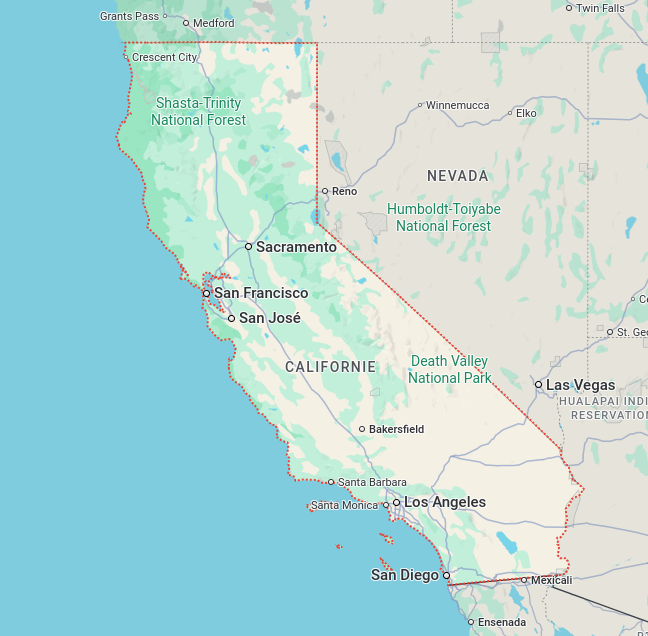

Notez dans les deux graphiques :

- Vous pouvez **passer la souris au-dessus** des barres et des points pour avoir plus d'informations
- Vous pouvez **cliquer+sélectionner un rectangle pour zoomer** sur une section du graphique (double-cliquez pour revenir au zoom initial)

On peut facilement faire des choses un peu plus avancées, comme colorier les points selon une 3e colonne :

In [18]:
px.scatter(california_housing_df,
           x="longitude", y="latitude",
           color="median_income",
           title="Revenus médians selon la position géographique")

In [19]:
px.scatter(california_housing_df,
           x="longitude", y="latitude",
           color="ocean_proximity",
           title="Proximité à l'océan selon la position géographique")

In [ ]:
#@title Exercice 2.1
# La variable `df` est un DataFrame avec les données immobilières de la Californie
# (mêmes qu'utilisées en exemple juste ci-haut)
df = pd.read_csv("https://raw.githubusercontent.com/WillKoehrsen/Hands-On-Machine-Learning/refs/heads/master/handson-ml-master/datasets/housing/housing.csv", sep=",")

###########

#### Affichez un histogramme du nombre de chambres à coucher dans chaque block



In [ ]:
#@title Exercice 2.2
### Affichez un nuage de points de la position (latitude/longitude)
### en colorant les points selon la valeur médiane des maisons



In [ ]:
#@title Exercice 2.3
### Affichez un nuage de points du nombre total de pièces en fonction  du nombre
### de ménages dans le block (households), puis coloriez les points avec la
### valeur médiane des maisons



## Accéder à des observations spécifiques (lignes)

Avec numpy, accéder à une ligne spécifique se fait avec `arr[numero]`. Pandas réserve cependant cette syntaxe avec des crochets pour accéder à des noms de caractéristiques (colonnes).

Pour trouver une ligne, on utilise plutôt

```python
mon_dataframe.loc[...]
```

In [23]:
# Première observation
display(california_housing_df.loc[0])


# Notez que la syntaxe de slice marche ici aussi, ex.: [0:10]

# 3 observations, de 10 à 12 __INCLUSIVEMENT__
display(california_housing_df.loc[10:12])

,0
longitude,-122.23
latitude,37.88
housing_median_age,41.0
total_rooms,880.0
total_bedrooms,129.0
population,322.0
households,126.0
median_income,8.3252
median_house_value,452600.0
ocean_proximity,NEAR BAY


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY


Notez la colonne tout à gauche, en gras. Il s'agit de l'**index**.

Initialement, l'index correspond aux numéros des lignes, mais quand on prend une sous-section des données, ces nombres ne sont pas réinitialisés.

`.loc[]` fonctionne avec un **index** qui reste attaché aux lignes.

In [24]:
# On prend 10 lignes, #50 à 55
quelques_lignes = california_housing_df.loc[50:55]

display(quelques_lignes)

# quelques_lignes.loc[0] ****** ERREUR:
# => L'index 0 n'est pas inclus dans la variable "quelques_lignes"


# La première des lignes est celle dont l'index est à 50
display(quelques_lignes.loc[50])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
50,-122.27,37.82,21.0,896.0,453.0,735.0,438.0,0.9218,171900.0,NEAR BAY
51,-122.27,37.82,43.0,1868.0,456.0,1061.0,407.0,1.5045,93800.0,NEAR BAY
52,-122.27,37.82,41.0,3221.0,853.0,1959.0,720.0,1.1108,97500.0,NEAR BAY
53,-122.27,37.82,52.0,1630.0,456.0,1162.0,400.0,1.2475,104200.0,NEAR BAY
54,-122.28,37.82,52.0,1170.0,235.0,701.0,233.0,1.6098,87500.0,NEAR BAY
55,-122.28,37.82,52.0,945.0,243.0,576.0,220.0,1.4113,83100.0,NEAR BAY


,50
longitude,-122.27
latitude,37.82
housing_median_age,21.0
total_rooms,896.0
total_bedrooms,453.0
population,735.0
households,438.0
median_income,0.9218
median_house_value,171900.0
ocean_proximity,NEAR BAY


Si ce qu'on souhaite est vraiment d'utiliser la position dans le `DataFrame`, on peut utiliser `.iloc[index]`, qui prend un numéro de ligne dans le `DataFrame` plutôt qu'un index :

In [25]:
# On prend 10 lignes, #50 à 59
dix_lignes = california_housing_df.loc[50:59]

# La position 0 sera le premier, soit celui avec index=50
display(dix_lignes.iloc[0])

,50
longitude,-122.27
latitude,37.82
housing_median_age,21.0
total_rooms,896.0
total_bedrooms,453.0
population,735.0
households,438.0
median_income,0.9218
median_house_value,171900.0
ocean_proximity,NEAR BAY


Cette façon de passer par un index plutôt que par des numéros de lignes directement a plusieurs avantages.

Quand on **trie les données** avec `.sort_values("nom de colonne")`, par exemple, les lignes changent de place mais l'index suit :

In [26]:
df_argent = california_housing_df[['median_income', 'median_house_value']]

df_argent = df_argent.sort_values('median_house_value')

# La première ligne de ce DataFrame est à l'index=19802
display(df_argent)

,median_income,median_house_value
19802,0.5360,14999.0
2521,1.6607,14999.0
2799,2.1000,14999.0
9188,4.1932,14999.0
5887,2.3667,17500.0
...,...,...
18321,7.9029,500001.0
18354,13.1867,500001.0
18355,11.8060,500001.0
18356,10.4277,500001.0


On pourrait alors extraire seulement certaines lignes intéressantes, ou encore accéder aux numéros de lignes via l'index du `DataFrame` :

In [27]:
# Afficher seulement les 3 premières lignes (les 3 blocks avec les maisons les moins chères)
display(df_argent.iloc[:3])

# 10 premiers index, ie, les index des 10 blocks où la valeur médiane des maisons est la plus petite
display(df_argent.index[:10])

,median_income,median_house_value
19802,0.5360,14999.0
2521,1.6607,14999.0
2799,2.1000,14999.0


Index([19802, 2521, 2799, 9188, 5887, 14326, 1825, 13889, 16186, 2779], dtype='int64')

In [ ]:
#@title Exercice 3
df = pd.read_csv("https://raw.githubusercontent.com/WillKoehrsen/Hands-On-Machine-Learning/refs/heads/master/handson-ml-master/datasets/housing/housing.csv", sep=",")

###########

### Donnez la moyenne de la taille de la population des 15 premiers blocks seulement (0 à 14 inclus)

### Affichez la latitude et la longitude des 5 blocks où les maisons sont
### les plus récentes (regardez la colonne housing_median_age)

### Parmi ces 5 plus récentes seulement, affichez le block (toute une ligne) pour
### lequel les maisons sont les plus chères? (regardez la colonne median_house_value)



## Petite note sur les `index`

Par défaut, ça correspond à des numéros de lignes, mais on pourrait avoir certains jeux de données pour lesquels un index autre ferait du sens, par exemple...

### Analyse des mots du français

L'Index sera la liste des mots, les colonnes seront les caractéristiques de chaque mot

In [29]:
mots = ['aimer', 'être', 'humain']
type_de_mot = ['verbe', 'verbe', 'nom']
occurences_dans_texte = [117, 73, 18]

infos_langue_fr = pd.DataFrame(
    {
        'type': type_de_mot,
        'occurences': occurences_dans_texte,
    },
    index=mots
)
display(infos_langue_fr)

print()
print("Nombre de fois que le mot 'humain:' apparaît", infos_langue_fr.loc["humain"].occurences)

,type,occurences
aimer,verbe,117
être,verbe,73
humain,nom,18



Nombre de fois que le mot 'humain:' apparaît 18


## Données catégoriques

Jusqu'ici, on a principalement touché aux données **quantitatives** (numériques).

La dernière colonne du jeu de données est plutôt une donnée **catégorique** (du texte).

Par défaut, elle se fait exclure de l'analyse rapide avec `.describe()` :

In [30]:
# La colonne ocean_proximity n'est PAS présente ici :
california_housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


On peut demander à décrire une colonne en particulier. Avec une colonne textuelle, on obtient une description différente :

- **unique** : le nombre de valeurs différentes
- **top** : la valeur qui revient le plus souvent
- **freq** le nombre de fois que la valeur la plus commune est présente.

Pour `ocean_proximity`, on va voir qu'il y a 5 valeurs possibles et que celle qui revient le plus souvent est `<1H OCEAN`

In [31]:
california_housing_df.ocean_proximity.describe()

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


Cette colonne est **catégorique** : elle indique à quelle catégorie de *proximité à l'océan* chaque block appartient parmi les 5 catégories possibles.

On peut lister les valeurs et le nombre de fois qu'elles apparaîssent avec la méthode `value_counts()` :

In [32]:
california_housing_df.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


On peut rapidement remarquer que la grande majorité des blocks sont à <1H de l'océan, et que très très peu de blocks sont situés sur une île.

On peut visualiser les proportions avec un **diagramme circulaire** (ie, en pointes de tartes, ou *pie chart* en anglais).

In [33]:
value_counts = california_housing_df.ocean_proximity.value_counts()

px.pie(value_counts, values=value_counts.values, names=value_counts.index)

Notez que `value_counts()` fonctionne avec n'importe quoi, pas juste du texte.

In [34]:
# Ça marche, mais c'est un peu lourd quand il y a beaucoup de valeurs différentes
display(california_housing_df.total_rooms.value_counts())

,count
total_rooms,
1527.0,18
1613.0,17
1582.0,17
2127.0,16
2053.0,15
...,...
4528.0,1
166.0,1
9807.0,1


## Boucler sur les données

Une façon simple de jouer avec les données est de faire une boucle sur tout le contenu.

Boucler sur une `Series` va faire parcourir les valeurs une après l'autre :

In [35]:
total = 0
for income in california_housing_df['median_income']:
  total += income
print(total)
print("Revenu médian total:", california_housing_df['median_income'].sum())

79890.64950000099
Revenu médian total: 79890.6495


Pour boucler sur toutes les lignes d'un `DataFrame`, on doit utiliser `mon_dataframe.iterrows()`.

Notez que la boucle `for` reçoit alors **deux variables** à chaque tour : l'index et la ligne de données :

In [36]:
for idx, ligne in california_housing_df.iterrows():
  print("Index =", idx)
  display(ligne)

  # La ligne peut être utilisée avec des `.nom_colonne` pour accéder aux données
  print("Nombre de pièces, exlucant les chambres:", ligne.total_rooms - ligne.total_bedrooms)

  if idx == 1:
      break # Pour l'exemple, on affiche selement 2 lignes

Index = 0


,0
longitude,-122.23
latitude,37.88
housing_median_age,41.0
total_rooms,880.0
total_bedrooms,129.0
population,322.0
households,126.0
median_income,8.3252
median_house_value,452600.0
ocean_proximity,NEAR BAY


Nombre de pièces, exlucant les chambres: 751.0
Index = 1


,1
longitude,-122.22
latitude,37.86
housing_median_age,21.0
total_rooms,7099.0
total_bedrooms,1106.0
population,2401.0
households,1138.0
median_income,8.3014
median_house_value,358500.0
ocean_proximity,NEAR BAY


Nombre de pièces, exlucant les chambres: 5993.0


In [ ]:
#@title Exercice 4
df = pd.read_csv("https://raw.githubusercontent.com/WillKoehrsen/Hands-On-Machine-Learning/refs/heads/master/handson-ml-master/datasets/housing/housing.csv", sep=",")

###########

### Boucler sur toutes les lignes du DataFrame pour trouver certaines lignes étranges
### Écrivez: Ligne numéro {index} suspecte:
### Population: ... alors que le nombre de ménages est de ...



## Transformations avancées sur des `Series/DataFrame`

Les `Series` se comportent essentiellement comme des tableaux numpy : on peut faire des opérations comme `+ - * /` dessus. On peut même les passer telles quelles à des fonctions mathématiques de numpy.

In [38]:
# ===== Opérations sur des `Series` =====

# -- Series avec Nombre --
# Le revenu médian est exprimé en dizaines de milliers de dollars
revenu_median = california_housing_df['median_income']
revenu_median = revenu_median * 10_000
display(revenu_median) # On l'affiche en dollars

# -- Series avec une autre Series --
# Ratio entre le revenu médian et la valeur de la maison
ratio = revenu_median / california_housing_df['median_house_value']
display(ratio)

# Le total des revenus médians, via une petite fonction comme dans Numpy
print("Revenu médian total:", california_housing_df['median_income'].sum())


# -- Opérateurs quelconques avec numpy --
log_du_revenu = np.log(revenu_median)
display(log_du_revenu)

,median_income
0,83252.0
1,83014.0
2,72574.0
3,56431.0
4,38462.0
...,...
20635,15603.0
20636,25568.0
20637,17000.0
20638,18672.0


,0
0,0.183942
1,0.231559
2,0.206118
3,0.165341
4,0.112396
...,...
20635,0.199782
20636,0.331621
20637,0.184182
20638,0.220449


Revenu médian total: 79890.6495


,median_income
0,11.329627
1,11.326765
2,11.192362
3,10.940774
4,10.557426
...,...
20635,9.655218
20636,10.149097
20637,9.740969
20638,9.834780



Pour les `DataFrame`, on va généralement appliquer une opération entre un `DataFrame` (2D) et une `Series` (1D).

Pour faire une opération de ce type, les **colonnes du `DataFrame`** doivent correspondre à l'**index de la `Series`**.

&nbsp;

Les opérateurs comme `.mean()`, `.std()` et autres, lorsqu'appliqués sur des `DataFrame` retournent une `Series` compatible :

In [39]:
# ===== Opérations sur des `DataFrame` =====
populations_et_menages = california_housing_df[['population', 'households']]
display(populations_et_menages)

# La moyenne calculée sur un DataFrame est faite colonne par colonne
# Le résultat est une Series dont l'index (la colonne en gras à gauche) correspond aux noms des colonnes
display(populations_et_menages.mean())

# Soustraire la moyenne à chaque case :
display(populations_et_menages - populations_et_menages.mean())

,population,households
0,322.0,126.0
1,2401.0,1138.0
2,496.0,177.0
3,558.0,219.0
4,565.0,259.0
...,...,...
20635,845.0,330.0
20636,356.0,114.0
20637,1007.0,433.0
20638,741.0,349.0


,0
population,1425.476744
households,499.539680


,population,households
0,-1103.476744,-373.53968
1,975.523256,638.46032
2,-929.476744,-322.53968
3,-867.476744,-280.53968
4,-860.476744,-240.53968
...,...,...
20635,-580.476744,-169.53968
20636,-1069.476744,-385.53968
20637,-418.476744,-66.53968
20638,-684.476744,-150.53968


Un peu comme pour les tableaux 2D numpy, on peut spécifier un `axis` pour les opérations `sum()`, `min()`, `max()`, ...

Pandas accepte les axes `0` ou `1`, mais permet aussi d'utiliser le **nom** de l'axe, parmi :

- `axis="columns"`
- `axis="index"`

In [40]:
points3D = np.random.random((10, 3))

points3D = pd.DataFrame(
        points3D,
        columns=["x", "y", "z"]
)

display(points3D)

display(points3D.sum(axis="columns")) # Somme des 3 colonnes entre elles
display(points3D.sum(axis="index")) # Somme des 9 lignes entre elles

,x,y,z
0,0.161606,0.166013,0.607529
1,0.141165,0.108998,0.463226
2,0.342555,0.708427,0.096354
3,0.718981,0.799525,0.959862
4,0.585192,0.120952,0.478452
5,0.069263,0.579653,0.453003
6,0.927547,0.781000,0.356700
7,0.464961,0.093707,0.330843
8,0.593606,0.857762,0.756327
9,0.446517,0.752600,0.188568


,0
0,0.935148
1,0.713389
2,1.147336
3,2.478368
4,1.184596
5,1.101919
6,2.065246
7,0.889511
8,2.207696
9,1.387685


,0
x,4.451393
y,4.968638
z,4.690864


In [ ]:
#@title Exercice 5.1
df = pd.read_csv("https://raw.githubusercontent.com/WillKoehrsen/Hands-On-Machine-Learning/refs/heads/master/handson-ml-master/datasets/housing/housing.csv", sep=",")

######

### Calculez le nombre de pièces divisé par le nombre de personnes dans chaque block
### Le résultat devrait être une Series (une structure pandas 1D)



In [ ]:
#@title Exercice 5.2
### Utilisez `.describe()` pour avoir un résumé des données de nombre de pièces par personne
### Lisez le minimum, la moyenne (mean) et le maximum.

### Dessinez l'histogramme du nombre de pièces par personne



In [ ]:
#@title Exercice 5.3
### Donnez le numéro de block (index) où il y a le *moins* de pièces par personne

### Pour ce block, affichez le nombre total de pièces dans le block (total_rooms), la population, et le nombre de maisons considérées (households)

### Regardez bien les chiffres et écrivez en commentaire dans le code: est-ce que le ratio de "pièces par personnes" calculé est logique?



In [ ]:
#@title Exercice 5.4
### La fonction `value_counts()` retourne une `Series`
### Pour obtenir des pourcentages au lieu du nombre total seulement, on peut
### diviser les valeurs par le nombre total d'observations

### Vérifiez que le total des proportions arrive à une somme de 100%



## Ajouter et supprimer des colonnes

On peut ajouter des colonnes avec `.assign(nom=...)`, qui retourne un nouveau `DataFrame` avec une colonne supplémentaire :

In [45]:
df_populations_et_menages = california_housing_df[['population', 'households']]

personnes_par_menage = df_populations_et_menages.population / df_populations_et_menages.households

df_nouveau1 = df_populations_et_menages.assign(personnes_par_menage=personnes_par_menage)

display(df_nouveau1)

,population,households,personnes_par_menage
0,322.0,126.0,2.555556
1,2401.0,1138.0,2.109842
2,496.0,177.0,2.802260
3,558.0,219.0,2.547945
4,565.0,259.0,2.181467
...,...,...,...
20635,845.0,330.0,2.560606
20636,356.0,114.0,3.122807
20637,1007.0,433.0,2.325635
20638,741.0,349.0,2.123209


Pour supprimer des colonnes, on peut utiliser `.drop(..., axis='columns')`, qui retourne un nouveau `DataFrame` sans la colonne :

In [46]:
df_nouveau2 = df_nouveau1.drop('population', axis='columns')
display(df_nouveau2)

,households,personnes_par_menage
0,126.0,2.555556
1,1138.0,2.109842
2,177.0,2.802260
3,219.0,2.547945
4,259.0,2.181467
...,...,...
20635,330.0,2.560606
20636,114.0,3.122807
20637,433.0,2.325635
20638,349.0,2.123209


La méthode `drop()` peut également être utilisée pour supprimer certaines lignes, en utilisant plutôt `drop(..., axis='index')`

In [47]:
# Supprime les lignes 3 et 4
df_nouveau3 = df_nouveau2.drop(3, axis='index')
df_nouveau3 = df_nouveau3.drop(4, axis='index')

# Supprime d'un coup les lignes suivantes
df_nouveau3 = df_nouveau2.drop([20636, 20637, 20638], axis='index')

display(df_nouveau3)

,households,personnes_par_menage
0,126.0,2.555556
1,1138.0,2.109842
2,177.0,2.802260
3,219.0,2.547945
4,259.0,2.181467
...,...,...
20632,385.0,2.719481
20633,382.0,2.832461
20634,344.0,3.026163
20635,330.0,2.560606


❌ Notez bien : ça **renvoie un *Nouveau `DataFrame`***, sans modifier l'ancien

Cette ligne toute seule ne fonctionnera pas :

```python
df.drop("median_income", axis="columns")
# => df contient encore "median_income"
```

✅ On doit assigner le résultat dans une variable :

Cette ligne toute seule ne fonctionnera pas :

```python
nouveau_df = df.drop("median_income", axis="columns")
# => df contient encore "median_income", mais nouveau_df non

# Il est possible de réutiliser le même nom de variable :
df = df.drop("median_income", axis="columns")
```



Dans le cas où on possède deux `DataFrame` et qu'on souhaite en faire un seul gros qui inclut tout, on peut les **concaténer** avec `pd.concat(..., axis=...)`

In [48]:
# Extrait un premier DataFrame de 2 colonnes
df_populations_et_menages = california_housing_df[['population', 'households']]
# Extrait un second DataFrame de 2 colonnes
df_argent = california_housing_df[['median_income', 'median_house_value']]

# Mix les deux ensemble pour avoir 2 + 2 = les 4 colonnes ensemble
df_concatene = pd.concat([df_populations_et_menages, df_argent], axis='columns')

display(df_concatene)

,population,households,median_income,median_house_value
0,322.0,126.0,8.3252,452600.0
1,2401.0,1138.0,8.3014,358500.0
2,496.0,177.0,7.2574,352100.0
3,558.0,219.0,5.6431,341300.0
4,565.0,259.0,3.8462,342200.0
...,...,...,...,...
20635,845.0,330.0,1.5603,78100.0
20636,356.0,114.0,2.5568,77100.0
20637,1007.0,433.0,1.7000,92300.0
20638,741.0,349.0,1.8672,84700.0


On peut faire la même chose avec les lignes, en spécifiant `axis='index'` :

In [49]:
df_argent = california_housing_df[['median_income', 'median_house_value']]

df_plus_pauvres = df_argent.sort_values('median_income').iloc[0:5]
df_plus_riches = df_argent.sort_values('median_income').iloc[-5:]

# Mix les deux ensemble pour avoir 2 + 2 = les 4 colonnes ensemble
df_plus_riches_et_plus_pauvres = pd.concat([df_plus_pauvres, df_plus_riches], axis='index')

display(df_plus_riches_et_plus_pauvres)

,median_income,median_house_value
19523,0.4999,82500.0
7125,0.4999,162500.0
6343,0.4999,112500.0
13999,0.4999,55000.0
20091,0.4999,162500.0
8849,15.0001,500001.0
18501,15.0001,131300.0
6399,15.0001,500001.0
18504,15.0001,400000.0
1566,15.0001,350000.0


In [ ]:
#@title Exercice 6.1

df = pd.read_csv("https://raw.githubusercontent.com/WillKoehrsen/Hands-On-Machine-Learning/refs/heads/master/handson-ml-master/datasets/housing/housing.csv", sep=",")

#####

### Supprimez les colonnes "ocean_proximity" et "total_bedrooms"
### Mettez le résultat dans "df" et affichez-le



On va ajouter une nouvelle colonne : la distance à San Francisco.

La latitude et la longitude, ce sont des coordonnées sur une sphère.

Pour calculer correctement la distance entre deux points sur une sphère, on utilise la formule de Haversine, que je vous fournis ici :

In [51]:
def haversine(xlat, ylat, xlon, ylon):
  return 2 * np.arcsin(np.sqrt(
      np.sin((xlat - ylat) / 2)**2 +
      np.cos(xlat) * np.cos(ylat) * np.sin((xlon - ylon) / 2)**2
  ))

In [ ]:
#@title Exercice 6.2

# La position de San Francisco est :
latitude = 37.7761
longitude = -122.4207

##########

### Créez un nouveau tableau vide `distances` (une liste python normale, pas besoin de numpy)

### Faites un DataFrame `df_position` qui contient seulement la latitude et la longitude

### Bouclez sur toutes les lignes de ce DataFrame
### À chaque tour de boucle, calculez la formule ci-haut avec les variables latitude/longitude
### et ajoutez le résultat dans votre tableau `distances`

### Une fois la boucle finie, convertissez `distances` en Series

### Assignez la série comme nouvelle colonne du DataFrame `df`, avec comme nom de
### colonne `distance_au_centre`

### Finalement, visualisez le résultat avec un px.scatter()



## Filtrage selon des conditions

Un peu comme pour Numpy, appliquer des conditions sur des `Series` donne une nouvelle `Series` contenant des valeurs `True/False` :

In [53]:
california_housing_df.population < 7

,population
0,False
1,False
2,False
3,False
4,False
...,...
20635,False
20636,False
20637,False
20638,False


On peut alors utiliser une syntaxe similaire à Numpy pour accéder à certaines lignes seulement :

In [54]:
# "california_housing_df TEL QUE la population est inférieure à 7"
california_housing_df[california_housing_df.population < 7]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.375,137500.0,INLAND
5342,-118.44,34.04,16.0,18.0,6.0,3.0,4.0,0.536,350000.0,<1H OCEAN
12458,-114.62,33.62,26.0,18.0,3.0,5.0,3.0,0.536,275000.0,INLAND


On peut utiliser les opérateurs de numpy pour combiner des conditions :

- `np.logical_and`
- `np.logical_or`
- `np.logical_not`

In [55]:
population_entre_30_et_100 = np.logical_and(
    california_housing_df.population > 30,
    california_housing_df.population < 100
)

california_housing_df[population_entre_30_et_100]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY
700,-122.03,37.69,20.0,200.0,25.0,83.0,31.0,6.5000,340000.0,NEAR BAY
779,-122.12,37.65,26.0,162.0,27.0,86.0,25.0,2.3750,137500.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20181,-119.32,34.35,16.0,52.0,16.0,51.0,15.0,2.4750,225000.0,NEAR OCEAN
20200,-119.19,34.25,12.0,232.0,37.0,79.0,35.0,4.1667,214600.0,NEAR OCEAN
20349,-119.08,34.17,32.0,166.0,22.0,63.0,29.0,7.3004,125000.0,NEAR OCEAN
20353,-119.05,34.13,12.0,57.0,22.0,69.0,15.0,5.0066,275000.0,NEAR OCEAN


## Exercices

In [ ]:
#@title Exercice 7.1
df = pd.read_csv("https://raw.githubusercontent.com/WillKoehrsen/Hands-On-Machine-Learning/refs/heads/master/handson-ml-master/datasets/housing/housing.csv", sep=",")

########

### Listez les valeurs des maisons situées sur une île (regardez les valeurs de ocean_proximity)

### Affichez seulement les lignes dont l'index est pair

### Affichez seulement les lignes dont l'index est pair et en bas de 10



In [ ]:
#@title Exercice 7.2
### Parmi les blocks qui respectent ces critères :
### - Il y a au moins 1000 personnes, et
### - L'âge médian des maisons est d'au moins 30 ans, et
### - Soit la maison est sur une île, soit elle est au bord de l'océan (NEAR_OCEAN)
### Listez, en dollars, le ratio median_income:median_house_value
### Puisque "median_income" est exprimé en dizaines de milliers de dollars mais
### que "median_house_value" est directement en dollars, vous aurez à ajuster l'échelle

### Affichez la moyenne de ces ratios

### Affichez un histogramme de ce que vous venez de calculer



In [ ]:
#@title Exercice 7.3
### Affichez un nuage de points des positions (longitude, latitude) seulement pour
### les blocks qui ont un salaire médian dans le top 5% des salaires médians les plus élevés



In [ ]:
#@title Exercice 7.4
### Faites la même chose mais pour le 5% le plus pauvre



## Données manquantes

On a mentionné vite fait au début que Pandas pouvait gérer des données manquantes, en inscrivant la valeur spéciale `NaN`.

On peut le remarquer en observant la colonne `total_bedrooms`, pour laquelle il manque des chiffres. Les valeurs manquantes vont apparaître à la fin du tri :

In [60]:
california_housing_df.total_bedrooms.sort_values()

,total_bedrooms
16171,1.0
3126,2.0
12286,2.0
3125,3.0
16888,3.0
...,...
20267,NaN
20268,NaN
20372,NaN
20460,NaN


Si on essaie de calculer des choses avec les valeurs manquantes, le résultat sera encore manquant

In [61]:
df_pieces_non_chambres = california_housing_df.total_rooms - california_housing_df.total_bedrooms

df_pieces_non_chambres.sort_values()

,0
5916,0.0
19435,0.0
3126,0.0
12286,4.0
4559,6.0
...,...
20267,NaN
20268,NaN
20372,NaN
20460,NaN


Laisser ces valeurs telles quelles va poser problème dans certaines applications.

On a plusieurs options :

- Les supprimer avec `.dropna()`
- Les remplacer par une valeur estimée qui fait du sens (ex: tout mettre à zéro, remplir les trous avec la moyenne de toute la colonne, ou encore estimer des valeurs à partir des autres colonnes)

Souvent, `.dropna()` est suffisant :

In [62]:
df_sans_valeurs_manquantes = california_housing_df.dropna()

df_pieces_non_chambres = df_sans_valeurs_manquantes.total_rooms - df_sans_valeurs_manquantes.total_bedrooms

df_pieces_non_chambres.sort_values()

,0
5916,0.0
19435,0.0
3126,0.0
12286,4.0
4559,6.0
...,...
9880,26182.0
9019,26312.0
6057,26764.0
10309,32466.0
